<a target="_blank" href="https://colab.research.google.com/github/gesund-ai/gesund/blob/notebooks/gesund/notebooks/ObjectDetection.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Healthcare Object Detection Task Notebook

This notebook provides and example of Gesund Validation with Object Detection

The notebook could be outlined as follows

- [Introduction](#intro)
- [Data Source](#data_source)
- [Basic Usage](#usage)
- [Explore Results](#results)

## <a id='intro'>Introduction</a>


To learn more about Gesundai Validation tool, Please visit the link <a href="https://gesund-ai.github.io/#gesund-ai">here</a>.

Please ensure you have installed the as per the installation instructions <a href="https://gesund-ai.github.io/user_guide.html#installation">here</a>.




## <a id='data_source'>Data Source</a>


To download the required JSON files, run the following commands in a Jupyter notebook cell


In [1]:
# Object Detection Annotation Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/object_detection/gesund_custom_format/gesund_custom_format_annotations_obj_det.json
# Object Detection Prediction Data
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/object_detection/gesund_custom_format/gesund_custom_format_predictions_obj_det.json
# Object Detection Mappings
!wget https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/object_detection/test_class_mappings.json

--2024-11-04 12:34:31--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/object_detection/gesund_custom_format/gesund_custom_format_annotations_obj_det.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 498707 (487K) [text/plain]
Saving to: ‘gesund_custom_format_annotations_obj_det.json’

gesund_custom_forma 100%[===================>] 487.02K  --.-KB/s    in 0.04s   

2024-11-04 12:34:31 (12.8 MB/s) - ‘gesund_custom_format_annotations_obj_det.json’ saved [498707/498707]

--2024-11-04 12:34:33--  https://raw.githubusercontent.com/gesund-ai/gesund/refs/heads/main/test_data/object_detection/gesund_custom_format/gesund_custom_format_predictions_obj_det.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.

`Note:` If you have do not have access yet to the gesund platform then working with JSON files with the specified formats will work as well.

## <a id='usage'> Basic Usage </a>

It is couple of simple lines of code to run `object detection validation` on your data. 

In [ ]:
# import the required libraries
from gesund.validation import run_metrics, plotting_metrics
import pprint
import os

In [ ]:
# provide the json files for respective values
args = {
    'annotations_json_path': '/path/to/annotations.json',
    'predictions': '/path/to/predictions.json',
    'class_mappings': '/path/to/class_mappings.json',
    'problem_type': 'object_detection',
    'format': 'json_format',
    'write_results_to_json': True
}

### Argument breakdown



The argumment input consists of the data path and parameters.

1. Annotation data: `annotations_json_path`:  the path of the json file containing the annotation data with respect to the images.
The structure of the annotation should be as follows

```
{
   "image_id_value": {
	"image_id": image_id_value,
	"annotation": [
	  {
		"label": integer_class_value,
		"points": [
			{
			"x": integer_value,
			"y": integer_value 
			}
			],
		"type": "rect"
    	   },
	   ...
	]
   }
}
```


2. Prediction: `predictions`: the json file path containing the prediction data with respect to the images.
The structure of the prediction could be as follows, if the input data is from the 

```
{
   "image_id_value": {
	"objects": [
		{
		  "box": {
			"x1": integer_value,
			"y1": integer_value,
			"x2": integer_value,
			"y2": integer_value
		   },
		   "confidence": float_value,
		   "prediction_class": integer_label
		},
		...
	],
	"image_id": "image_id_value",
	"shape": [width, height],
    },
    ...
}

```

3. Label dictionary: `class_mappings`: Label mapping of the class labels

```
{"0": "red blood cell", "1": "trophozoite", "2": "schizont", "3": "difficult", "4": "ring", "5": "leukocyte"}
```

4. Problem Type: `problem_type`: Type of the problem in this context is `object_detection` 

5. Format: `format`: Format of the json file could be 'coco', 'yolo' or 'gesund_format'. The prior two are standards as followed in general and the last format is as explained in point 1 and 5.

6. Write results: `write_results_to_json`: boolean value to write the results in json file

## <a id="results">Explore Results</a>

### Results breakdown

In [ ]:
# execute the validation metrics
result = run_metrics(args)
args["plot_configs"] = {
        'mixed_plot': {'mixed_plot': ['map10', 'map50', 'map75'], 'threshold': 0.5}, 
        'top_misses': {'min_miou': 0.70, 'top_n': 10}, 
        'confidence_histogram': {'confidence_histogram_labels': ['TP', 'FP']}, 
        'classbased_table': {'classbased_table_metrics': ['precision', 'recall', 'f1'], 'threshold': 0.2}, 
        'overall_metrics': {'overall_metrics_metrics': ['map', 'mar'], 'threshold': 0.5}, 
        'blind_spot': {'blind_spot_Average': ['mAP@50', 'mAP@10','mAR@max=10','mAR@max=100'],'threshold': 0.5} 
}
plotting_metrics(result, args)

When you run the above cell, logs will appear stating the progress of the validation execution. The results could be explained, the `results` returned by the `run_metrics` and the `outputs` folder produced in the process are the same only in different forms. To understand in detail about what validation metrics mean, please visit the explaination <a href="https://gesund-ai.github.io/validation_metrics.html">here</a>


Following is the directory structure of the folder.
```
-- outputs
 |- batch_job_id  
   |- plot_jsons  # json files
      |- main_metric.json
      ...
   |- plot 
      |- blind_spot.png
      ... 
```


Results: `results`: consists of following keys 
- `main_metric`: contains the mean average precision value at 10 threshold.
- `plot_blind_spot_metrics`: contains the dictionary for all the classes involved. For each class average precision, average recall are calculated at thresholds 10, 50, 75, at an interval of [.50, .95], max at 1, 10, 100.
- `plot_confidence_histogram_scatter_distribution`: contains the data for plotting the histogram scatter distribution
- `plot_highlighted_overall_metrics`: contains the data for plotting mean average preicion and recall at specific thresholds
- `plot_meta_distribution`: contains the data for plotting bar charts where the data is plotted only when metadata is available in the input
- `plot_object_counts`: contains the distribution count of samples in the input data
- `plot_performance_by_iou_threshold`: contains the data for mean average precision and recall at specific thresholds
- `plot_prediction_distribution`: contains the data for pie chart distribution of prediction of classes
- `plot_statistics_classbased_table`: contains the class-wise data for each class with average precision and recall at the specific thresholds
- `plot_top_misses`: contains the mean intersection over union ranked in descending order and corresponding image ids indicating the top misses by the model
- `plot_training_validation_comparison_classbased_table`: contains data for plotting bar chart with mean average precision at specific threshold
- `problem_type`: string value indicating the problem type 
- `batch_job_id`: batch job id value identifier 
- `successful_batch_data`: the input prediction data
- `annotation_data`: the input annotation data
- `meta_data`: the input metadata
- `class_mappings`: the input class mappings
- `format`: the input json format
- `output_dir`: the path where the output folder is stored

### Output JSON file breakdown

The JSON files are found under the 

```
outputs/
|- batch_job_id
   |- plot_jsons
```

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pprint
import os

In [36]:
batch_id = result["batch_job_id"]
folder_path = os.path.join(*["outputs", batch_id, "plot_jsons"])
folder_path

'outputs\\6726f2651414e6dd53e13923\\plot_jsons'

In [37]:
# load the data main metric
with open("{}/main_metric.json".format(folder_path), "r") as f:
    data = json.load(f)
    pprint.pprint(data)

{'mAP@10': 0.9818}


As mentioned above the JSON files contains the same data as in the result variable. The files are provided for persistent storage of data.

### Output plot breakdown

The plots could be found under the following folder location

```
outputs/
|- batch_job_id
   |- plots
```

In [41]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [49]:
batch_id = result["batch_job_id"]
image_folder = os.path.join(*["outputs", batch_id, "plots"])

def load_image(image_file):
    img_path = os.path.join(image_folder, image_file) 
    img = mpimg.imread(img_path) 
    plt.imshow(img)
    plt.axis("off")

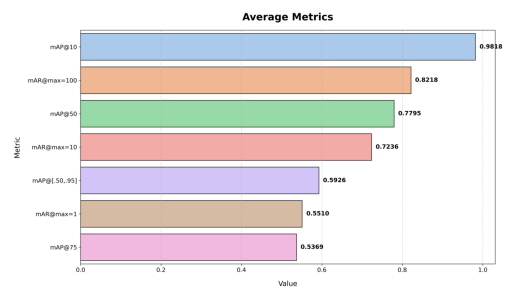

In [50]:
load_image("blind_spot.png")

`Average metrics` Each bar represents a different metric, with the length of the bar indicating the value. The x-axis ranges from 0 to 1, showing the performance or measurement across mean average precision and recall along the threshold.

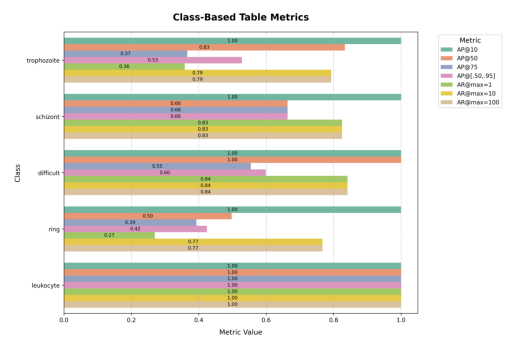

In [51]:
load_image("classbased_table.png")

`Class-based Table metrics` The class based table metrics provides the bar chart information for each class involved in the validation metrics for average precision and recall at threshold.

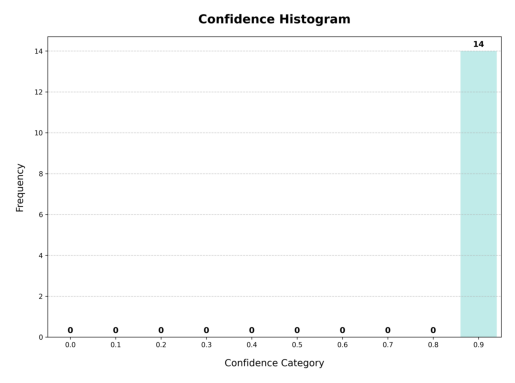

In [ ]:
load_image("confidence_histogram_histogram.png")

`Confidence histogram` The plot describes the confidence distribution for the prediction values. This helps in identifying the samples with confidence value.

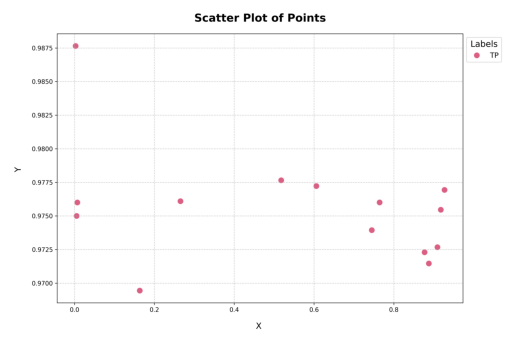

In [53]:
load_image("confidence_histogram_scatter.png")

`Confidence distribution scatter` plots the confidence scores from the samples. This helps in discovering any relationship between the samples of distributions.

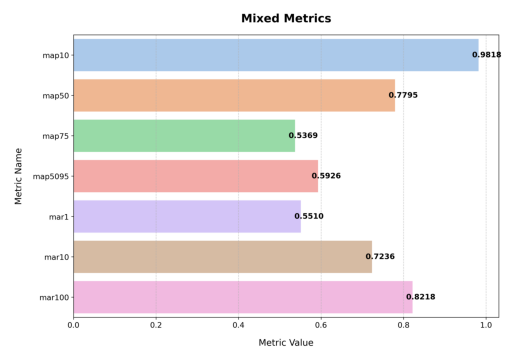

In [54]:
load_image("mixed_plot.png")

`Mixed metrics` plots the average precision score and average recall score at the thresholds.

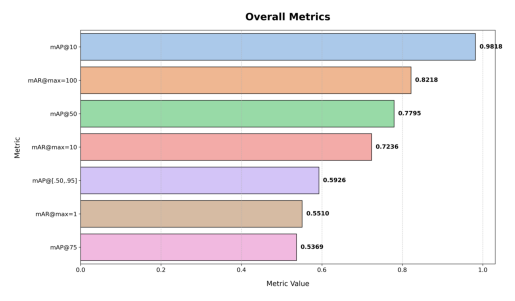

In [55]:
load_image("overall_metrics.png")

`Overall metrics` plots the metrics calculated overall the samples.

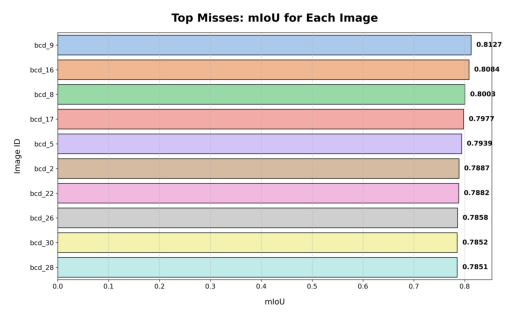

In [56]:
load_image("top_misses.png")

`Top misses` ranks the top images corresponding to the mean intersection over union values.